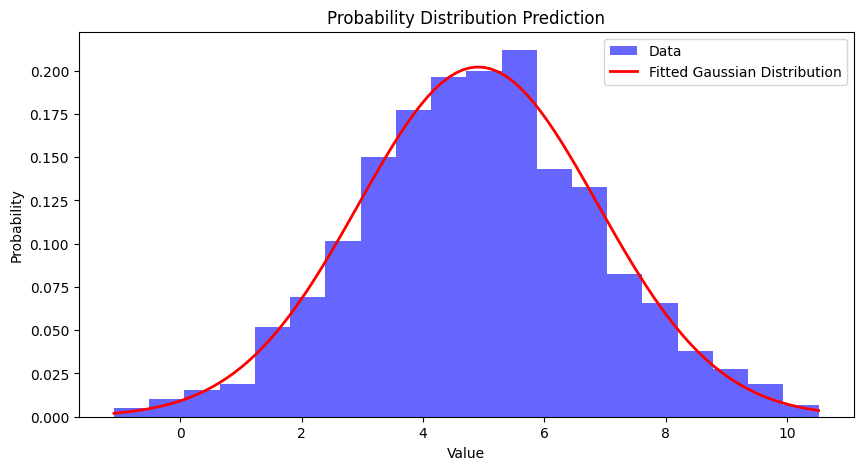

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Generate some random data
np.random.seed(0)  # For reproducibility
data = np.random.normal(loc=5, scale=2, size=1000)

# Fit a probability distribution (Gaussian distribution) to the data
mu, std = norm.fit(data)

# Create a range of values for the x-axis
x = np.linspace(data.min(), data.max(), 100)

# Calculate the probability density function (PDF) for the fitted Gaussian distribution
pdf = norm.pdf(x, mu, std)

# Plot the data and the fitted distribution
plt.figure(figsize=(10, 5))
plt.hist(data, bins=20, density=True, alpha=0.6, color='b', label='Data')
plt.plot(x, pdf, 'r-', lw=2, label='Fitted Gaussian Distribution')
plt.title('Probability Distribution Prediction')
plt.xlabel('Value')
plt.ylabel('Probability')
plt.legend()
plt.show()
